[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Accuracy: 0.8943

Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.88      0.89      5055
           1       0.88      0.91      0.89      4945

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



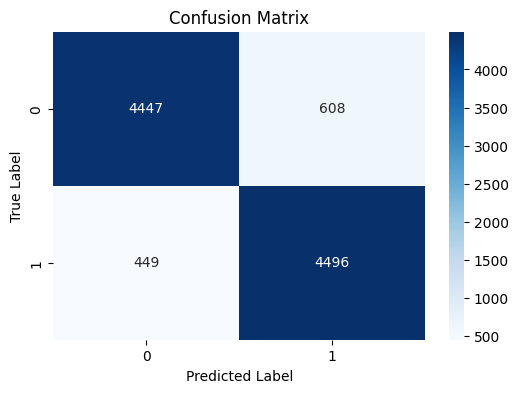

In [7]:
# ============================================
# SENTIMENT CLASSIFICATION — FINAL VERSION
# ============================================

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    confusion_matrix
)

import nltk
from nltk.corpus import stopwords

nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

# ============================================
# 1. LOAD REAL IMDB DATASET FROM HUGGINGFACE
# ============================================

from datasets import load_dataset
dataset = load_dataset("imdb")

# Convert Dataset columns to Python lists
texts_train = list(dataset["train"]["text"])
texts_test = list(dataset["test"]["text"])

labels_train = list(dataset["train"]["label"])
labels_test = list(dataset["test"]["label"])

# Combine train + test (we split manually later)
texts = np.array(texts_train + texts_test)
labels = np.array(labels_train + labels_test)

# ============================================
# 2. TEXT CLEANING FUNCTION
# ============================================

def clean_text(text):
    """
    Clean raw text by:
    - converting to lowercase
    - removing punctuation
    - removing non-letter characters
    - removing stopwords
    """
    text = text.lower()

    # Remove punctuation and special characters
    text = re.sub(r"[^a-zA-Z\s]", " ", text)

    # Remove stopwords
    words = [w for w in text.split() if w not in stop_words]

    return " ".join(words)

# Apply cleaning to all reviews
cleaned_texts = np.array([clean_text(t) for t in texts])


# 3. TRAIN/TEST SPLIT (80/20)


X_train, X_test, y_train, y_test = train_test_split(
    cleaned_texts,
    labels,
    test_size=0.2,
    random_state=42
)

# ============================================
# 4. Logistic Regression

model = Pipeline([
    ("tfidf", TfidfVectorizer(max_features=20000)),
    ("clf", LogisticRegression(max_iter=3000))
])

# Train the model
model.fit(X_train, y_train)

# ============================================
# 5. MODEL EVALUATION
# ============================================

pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, pred))
print("\nClassification Report:\n")
print(classification_report(y_test, pred))

# Confusion matrix
cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [2]:
# ============================================
# 6. RANDOM PREDICTION EXAMPLES
# ============================================

import random
print("\n=== RANDOM 5 PREDICTIONS ===")

for _ in range(5):
    idx = random.randint(0, len(X_test) - 1)
    print("\nREVIEW:", X_test[idx][:300], "...")
    print("Prediction:", "positive" if pred[idx] == 1 else "negative")


=== RANDOM 5 PREDICTIONS ===

REVIEW: movie idiotic attempt kind action thriller tour bus way las vegas attacked group white trash hijackers driving dune buggies drive desert steal valuables plot changes constantly one minute looking kidnap rich ranchers daughter next looking collectible stamp worth dollars dialogue horrible br br pleas ...
Prediction: negative

REVIEW: loved show much incredibly sad canceled thought came back two stupid weeks thats terrible hate never find everyone ends sucks bring back abc stupid shows like supernanny whatnot give time good ones like six degrees complaining ratings probably bad slot truly good show something could relate anticipa ...
Prediction: negative

REVIEW: purchased dvd set recommendation amazon com based interests hit nail head one remember watching show tv always wondered happened ten years later like watching first time lucas black caleb temple gary cole sheriff lucas buck great together even though somewhat rivals almost representing good

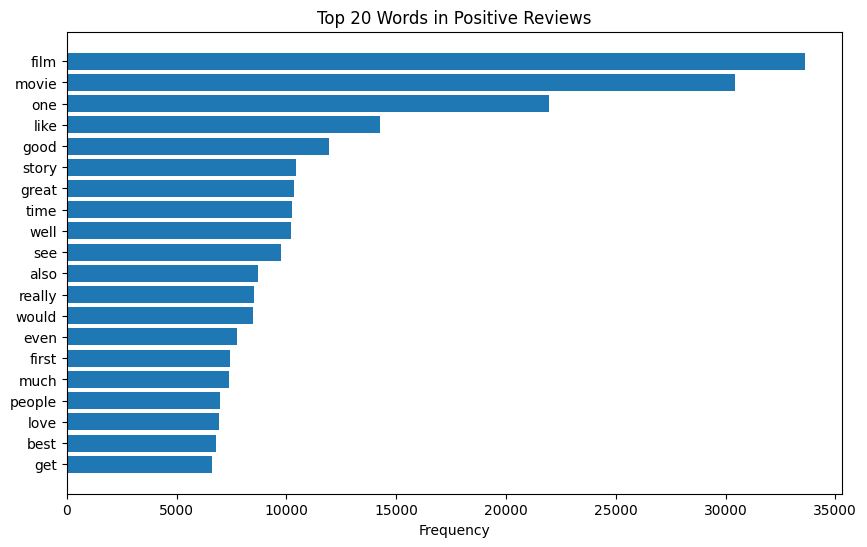

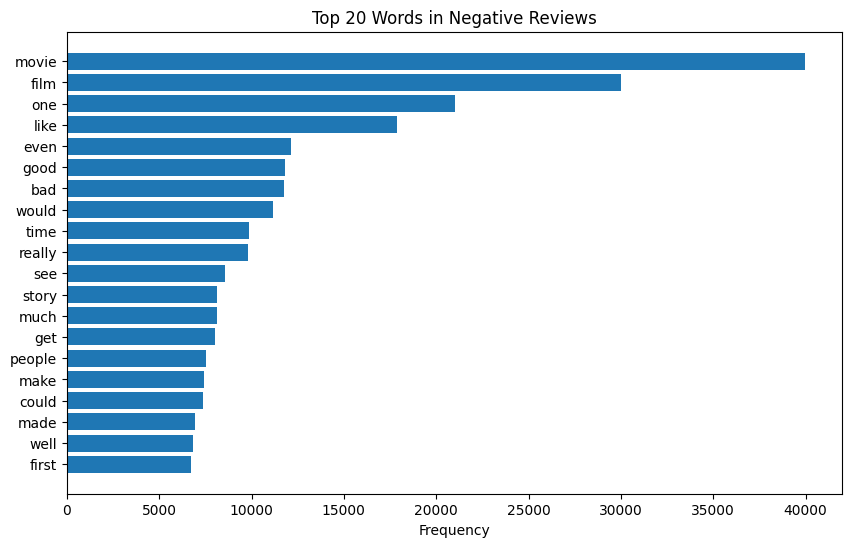

In [8]:
# ============================================
# 7. WORD FREQUENCY VISUALIZATION
# ============================================

# Split reviews by label
pos_reviews = X_train[y_train == 1]
neg_reviews = X_train[y_train == 0]

def collect_words(texts):
    """
    Collect all words from list of strings.
    Ignore very short words (len < 3).
    """
    words = []
    for t in texts:
        for w in t.split():
            if len(w) > 2:
                words.append(w)
    return words

pos_words = collect_words(pos_reviews)
neg_words = collect_words(neg_reviews)

# Top 20 frequent words
top_pos = Counter(pos_words).most_common(20)
top_neg = Counter(neg_words).most_common(20)

def plot_top_words(top_words, title):
    words, counts = zip(*top_words)
    plt.figure(figsize=(10,6))
    plt.barh(words, counts)
    plt.gca().invert_yaxis()
    plt.title(title)
    plt.xlabel("Frequency")
    plt.show()

plot_top_words(top_pos, "Top 20 Words in Positive Reviews")
plot_top_words(top_neg, "Top 20 Words in Negative Reviews")